In [1]:
import pvlib
from openenergyid.pvsim.pvlib.models import (
    PVLibModelChain,
    PVLibPVSystem,
    PVLibLocation,
    PVLibArray,
    PVWattsInverter,
)

In [2]:
mc = PVLibModelChain(
    system=PVLibPVSystem(
        arrays=PVLibArray(
            mount=pvlib.pvsystem.FixedMount(surface_tilt=35, surface_azimuth=240),
            modules_per_string=6,
        ),
        inverter_parameters=PVWattsInverter(pdc0=2500),
    ),
    location=PVLibLocation(latitude=51.2, longitude=4.4, tz="Europe/Brussels"),
    year=2024,
    utc_offset=1,
)

In [3]:
mc.model_dump(mode="json", exclude_defaults=True)

{'system': {'arrays': {'mount': {'surface_tilt': 35.0,
    'surface_azimuth': 240.0},
   'modules_per_string': 6},
  'inverter_parameters': {'pdc0': 2500.0}},
 'location': {'latitude': 51.2, 'longitude': 4.4, 'tz': 'Europe/Brussels'},
 'year': 2024,
 'utc_offset': 1}

In [4]:
from openenergyid.pvsim.pvlib.main import PVLibSimulator

sim = PVLibSimulator.from_pydantic(mc)

In [5]:
sim.simulation_results

2024-01-01 00:00:00+01:00    0.0
2024-01-01 00:15:00+01:00    0.0
2024-01-01 00:30:00+01:00    0.0
2024-01-01 00:45:00+01:00    0.0
2024-01-01 01:00:00+01:00    0.0
                            ... 
2024-12-31 22:45:00+01:00    0.0
2024-12-31 23:00:00+01:00    0.0
2024-12-31 23:15:00+01:00    0.0
2024-12-31 23:30:00+01:00    0.0
2024-12-31 23:45:00+01:00    0.0
Freq: 15min, Name: p_mp, Length: 35136, dtype: float64

<Axes: >

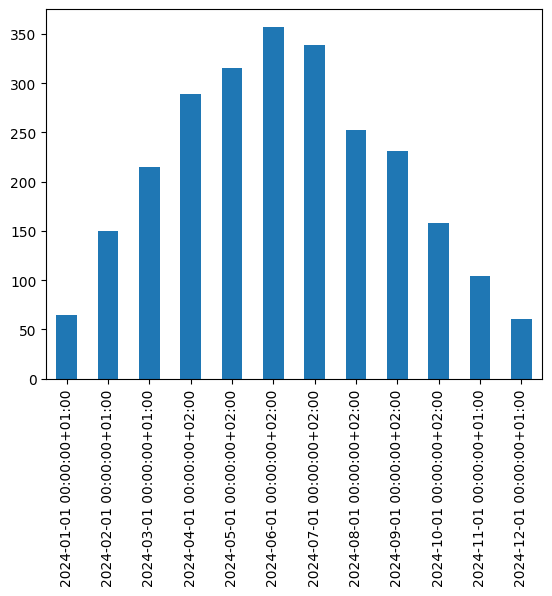

In [7]:
sim.simulation_results.resample("MS").sum().plot.bar()

In [8]:
sim.simulation_results.sum()

np.float64(2534.4837578756747)